In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../data/processed/diabetes_clean_model_ready.csv")
df.shape, df.head()


((253680, 19),
    HighBP  HighChol   BMI  Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  \
 0     1.0       1.0  40.0     1.0     0.0                   0.0           0.0   
 1     0.0       0.0  25.0     1.0     0.0                   0.0           1.0   
 2     1.0       1.0  28.0     0.0     0.0                   0.0           0.0   
 3     1.0       0.0  27.0     0.0     0.0                   0.0           1.0   
 4     1.0       1.0  24.0     0.0     0.0                   0.0           1.0   
 
    HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  \
 0                0.0            1.0          0.0      5.0      18.0      15.0   
 1                0.0            0.0          1.0      3.0       0.0       0.0   
 2                0.0            1.0          1.0      5.0      30.0      30.0   
 3                0.0            1.0          0.0      2.0       0.0       0.0   
 4                0.0            1.0          0.0      2.0       3.0       0.0   

In [3]:
df["Diabetes_binary"].value_counts(normalize=True)


Diabetes_binary
0    0.860667
1    0.139333
Name: proportion, dtype: float64

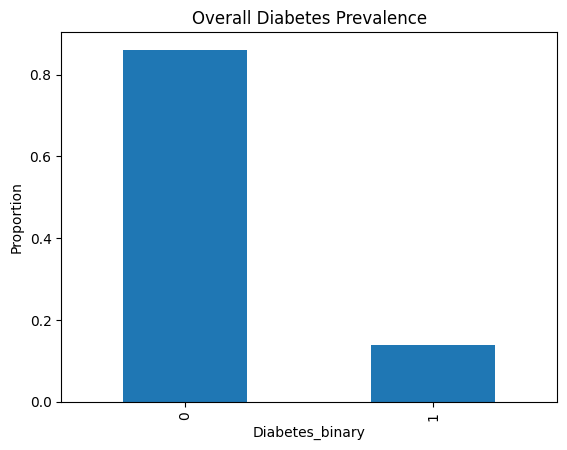

In [4]:
df["Diabetes_binary"].value_counts(normalize=True).plot(
    kind="bar",
    title="Overall Diabetes Prevalence",
)
plt.ylabel("Proportion")
plt.show()


In [5]:
sex_diabetes = df.groupby("Sex")["Diabetes_binary"].mean()
sex_diabetes


Sex
0.0    0.129679
1.0    0.151603
Name: Diabetes_binary, dtype: float64

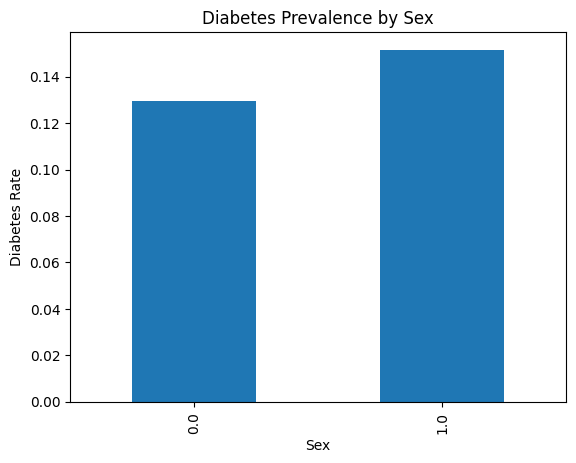

In [6]:
sex_diabetes.plot(kind="bar", title="Diabetes Prevalence by Sex")
plt.ylabel("Diabetes Rate")
plt.show()


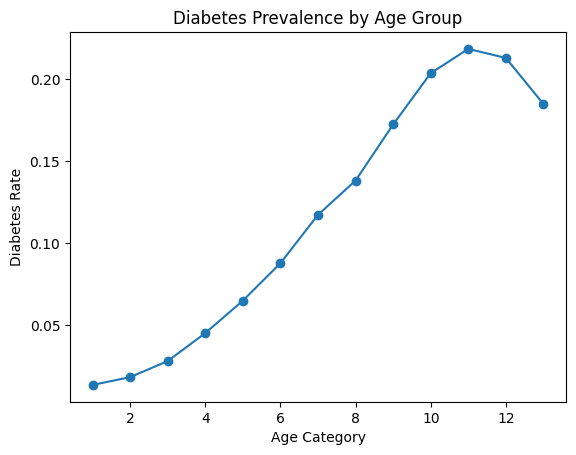

In [7]:
age_diabetes = df.groupby("Age")["Diabetes_binary"].mean()

age_diabetes.plot(
    kind="line", marker="o",
    title="Diabetes Prevalence by Age Group"
)
plt.ylabel("Diabetes Rate")
plt.xlabel("Age Category")
plt.show()


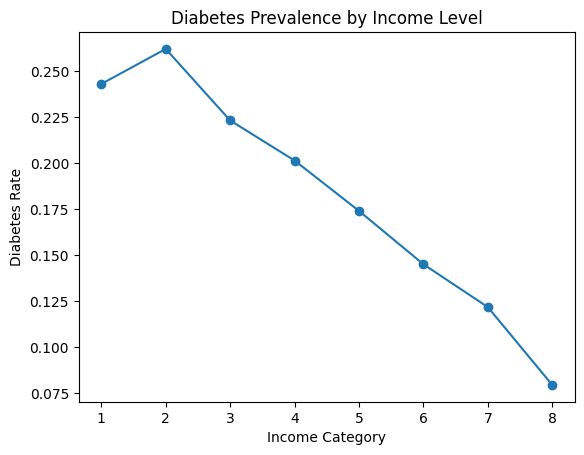

In [8]:
income_diabetes = df.groupby("Income")["Diabetes_binary"].mean()

income_diabetes.plot(
    kind="line", marker="o",
    title="Diabetes Prevalence by Income Level"
)
plt.ylabel("Diabetes Rate")
plt.xlabel("Income Category")
plt.show()


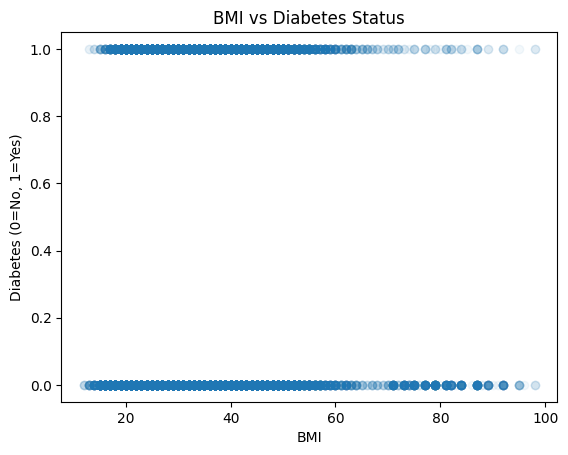

In [9]:
plt.scatter(df["BMI"], df["Diabetes_binary"], alpha=0.05)
plt.xlabel("BMI")
plt.ylabel("Diabetes (0=No, 1=Yes)")
plt.title("BMI vs Diabetes Status")
plt.show()


In [10]:
access_diabetes = df.groupby("AnyHealthcare")["Diabetes_binary"].mean()
access_diabetes


AnyHealthcare
0.0    0.11452
1.0    0.14061
Name: Diabetes_binary, dtype: float64

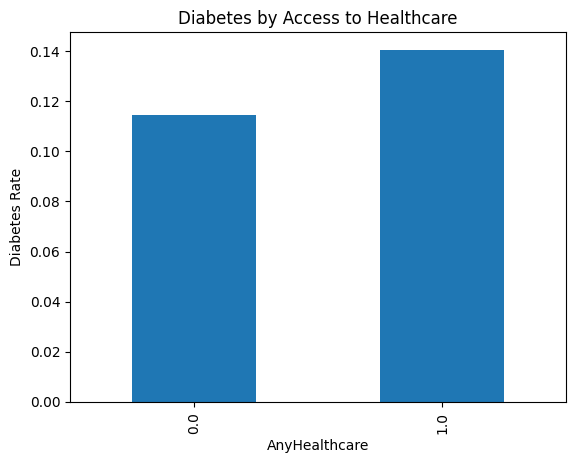

In [11]:
access_diabetes.plot(kind="bar", title="Diabetes by Access to Healthcare")
plt.ylabel("Diabetes Rate")
plt.show()


In [12]:
corr = df.corr()["Diabetes_binary"].sort_values(ascending=False)
corr


Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64

In [13]:
corr.head(10).to_frame("Correlation with Diabetes")


,Correlation with Diabetes
Diabetes_binary,1.000000
GenHlth,0.293569
HighBP,0.263129
DiffWalk,0.218344
BMI,0.216843
HighChol,0.200276
Age,0.177442
HeartDiseaseorAttack,0.177282
PhysHlth,0.171337
Stroke,0.105816


In [14]:
eda_summary = pd.DataFrame({
    "Sex_Diabetes_Rate": sex_diabetes,
    "Income_Diabetes_Rate": income_diabetes,
    "Access_Diabetes_Rate": access_diabetes
})

eda_summary.to_csv("../data/processed/eda_summary_diabetes.csv")
eda_summary


,Sex_Diabetes_Rate,Income_Diabetes_Rate,Access_Diabetes_Rate
0.0,0.129679,NaN,0.11452
1.0,0.151603,0.242891,0.14061
2.0,NaN,0.261903,NaN
3.0,NaN,0.223084,NaN
4.0,NaN,0.201341,NaN
5.0,NaN,0.174014,NaN
6.0,NaN,0.145078,NaN
7.0,NaN,0.121821,NaN
8.0,NaN,0.079604,NaN
